## Assignment 3 
### SADITH W.M.L. - 190538N

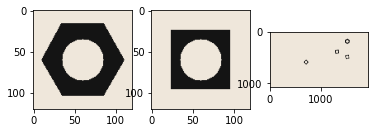

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image

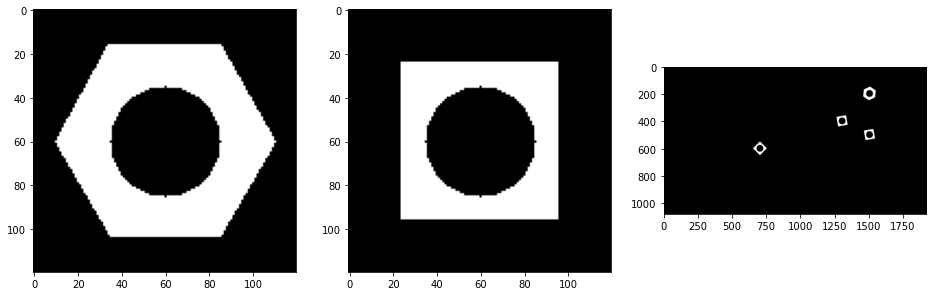

Threshold value for hexnut: 20.0
Threshold value for squarenut: 20.0
Threshold value for conveyor belt image : 20.0


In [2]:
#Convert to gray scale
hexnut_gray = cv.cvtColor(hexnut_template, cv.COLOR_RGB2GRAY)
squarenut_gray = cv.cvtColor(squarenut_template, cv.COLOR_RGB2GRAY)
conveyor_gray = cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)

#Apply otsu thresholding
thresh_hexnut,img_th_hexnut = cv.threshold(hexnut_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
thresh_squarenut,img_th_squarenut = cv.threshold(squarenut_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
thresh_conveyor,img_th_conveyor = cv.threshold(conveyor_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

#Display output Images
fig, ax = plt. subplots(1,3, figsize=(16,10))
ax[0].imshow(cv.cvtColor(img_th_hexnut, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(img_th_squarenut, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(img_th_conveyor, cv.COLOR_RGB2BGR))
plt.show()

#Print selected threshold values
print("Threshold value for hexnut:",thresh_hexnut)
print("Threshold value for squarenut:",thresh_squarenut)
print("Threshold value for conveyor belt image :",thresh_conveyor)

Carry out morphological closing to remove small holes inside the foreground

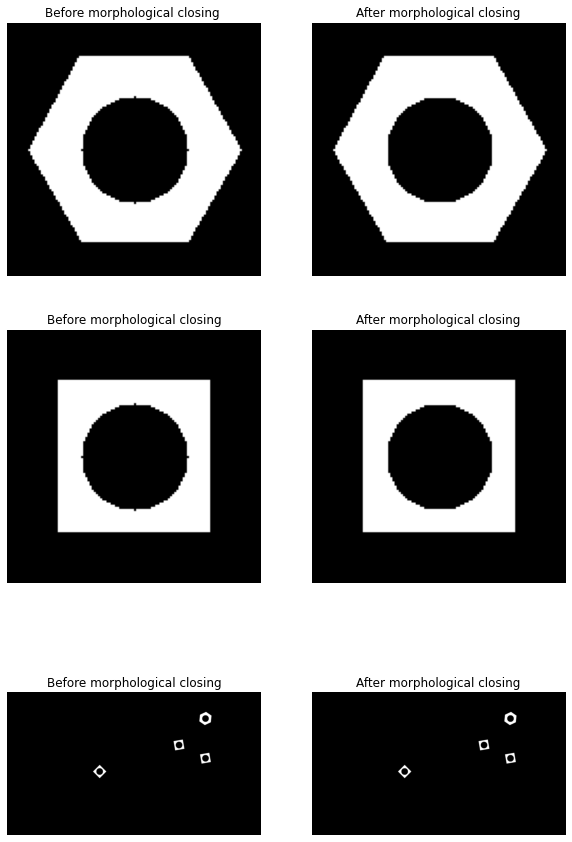

In [3]:
kernel = np.ones((3,3),np.uint8)
#morphological closing of small holes in images
morph_hexnut = cv.morphologyEx(img_th_hexnut, cv.MORPH_CLOSE, kernel)
morph_squarenut = cv.morphologyEx(img_th_squarenut, cv.MORPH_CLOSE, kernel)
morph_conveyor= cv.morphologyEx(img_th_conveyor, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(3,2,figsize = (10,16))

ax[0][0].imshow(cv.cvtColor(img_th_hexnut, cv.COLOR_RGB2BGR))
ax[0][1].imshow(cv.cvtColor(morph_hexnut, cv.COLOR_RGB2BGR))

ax[1][0].imshow(cv.cvtColor(img_th_squarenut, cv.COLOR_RGB2BGR))
ax[1][1].imshow(cv.cvtColor(morph_squarenut, cv.COLOR_RGB2BGR))

ax[2][0].imshow(cv.cvtColor(img_th_conveyor, cv.COLOR_RGB2BGR))
ax[2][1].imshow(cv.cvtColor(morph_conveyor, cv.COLOR_RGB2BGR))

ax[0][0].set_title("Before morphological closing ")
ax[0][1].set_title("After morphological closing")
ax[1][0].set_title("Before morphological closing")
ax[1][1].set_title("After morphological closing")
ax[2][0].set_title("Before morphological closing")
ax[2][1].set_title("After morphological closing")

[axi.set_axis_off() for axi in ax.ravel()]
plt.show()

Connected components analysis

In [4]:
ret_hexnut, labels_hexnut, stats_hexnut, centroids_hexnut = cv.connectedComponentsWithStats(morph_hexnut)
ret_squarenut, labels_squarenut, stats_squarenut, centroids_squarenut = cv.connectedComponentsWithStats(morph_squarenut)
ret_conveyor, labels_conveyor, stats_conveyor, centroids_conveyor = cv.connectedComponentsWithStats(morph_conveyor)

print("Number of connected components in the conveyor belt (With backgroud) =", ret_conveyor)

Number of connected components in the conveyor belt (With backgroud) = 5


b. What are the statistics?

Each row contains the statistics for connected component. The first row always corresponds to the background.

1. column 1: The leftmost x coordinate of the bounding box.
2. column 2: The topmost y coordinate of the bounding box.
3. column 3: The width of the bounding box.
4. column 4: The height of the bounding box.
5. column 5: The total area (in pixels) of the connected component.

In [5]:
print("Statistics of the Conveyor Belt:")
print(stats_conveyor)
print("Statistics of the hexagonal nut:")
print(stats_hexnut)
print("Statistics of the square nut:")
print(stats_squarenut)


Statistics of the Conveyor Belt:
[[      0       0    1920    1080 2059646]
 [   1454     150      92     100    4636]
 [   1259     359      82      82    3087]
 [   1459     459      82      82    3087]
 [    650     550     101     101    3144]]
Statistics of the hexagonal nut:
[[   0    0  120  120 9672]
 [  10   16  101   88 4728]]
Statistics of the square nut:
[[    0     0   120   120 11173]
 [   24    24    72    72  3227]]


In [6]:
print("Centroids:")
print(centroids_conveyor)

Centroids:
[[ 957.36323524  540.44416273]
 [1499.24201898  199.28515962]
 [1299.18302559  399.18302559]
 [1499.18302559  499.18302559]
 [ 700.          600.        ]]


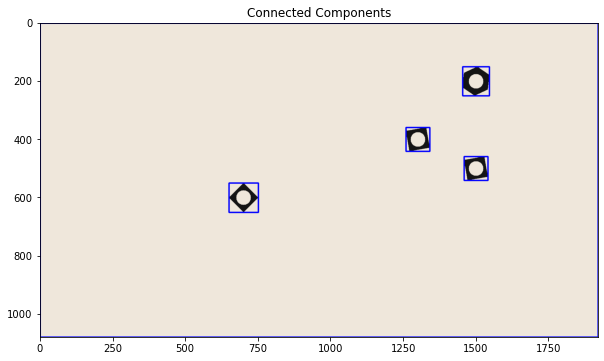

In [29]:
img_output = conveyor_f100.copy()

for i in range(0, ret_conveyor):
	x = stats_conveyor[i, cv.CC_STAT_LEFT]
	y = stats_conveyor[i, cv.CC_STAT_TOP]
	w = stats_conveyor[i, cv.CC_STAT_WIDTH]
	h = stats_conveyor[i, cv.CC_STAT_HEIGHT]
	# Draw a recatangle around the connected components
	cv.rectangle(img_output, (x, y), (x + w, y + h), (255, 0, 0), 3)

plt.figure(figsize=(10,8))
plt.title("Connected Components")
plt.imshow(cv.cvtColor(img_output, cv.COLOR_RGB2BGR))
plt.show()

Finding extreme outer contours

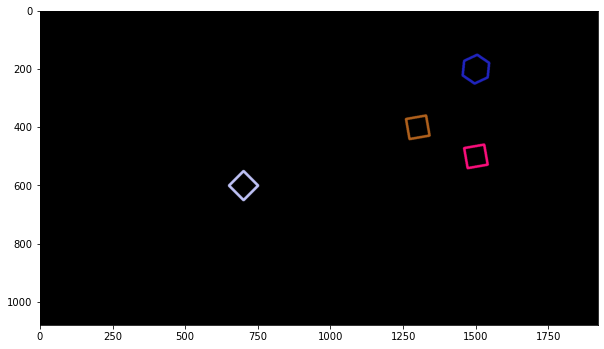

In [40]:
img_contours = np.zeros((morph_conveyor.shape[0], morph_conveyor.shape[1], 3), dtype=np.uint8)
contours, hierarchy = cv.findContours(morph_conveyor, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    random_color=list(np.random.choice(range(255),size=3))
    color = (int (random_color[0]), int(random_color[1]), int(random_color[2]))
    cv.drawContours(img_contours, contours, i, color, 7, cv.LINE_8, hierarchy, 0)

plt.figure(figsize=(10,10))
plt.imshow(img_contours)
plt.show()

#### Detecting Objects on a Synthetic Conveyor

In [14]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


Count the number of matching hexagonal nuts in conveyor_f100.png

In [15]:
h_contours, h_hierarchy = cv.findContours(morph_hexnut, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#Get the contour of the hex nut
h_cnt = h_contours[0]

s_contours, s_hierarchy = cv.findContours(morph_squarenut, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#Get the contour of the square nut
s_cnt = s_contours[0]

h_count = 0
#Match with contours of the conveyor belt
for i in range (0,len(contours)):
    cnt = contours[i]
    h_ret = cv.matchShapes(h_cnt,cnt,1,0.0)
    s_ret = cv.matchShapes(s_cnt,cnt,1,0.0)
    if h_ret<s_ret and h_ret<0.0001:
        h_count+=1
print("Number of Hexagonal nuts in the image: ",h_count)

Number of Hexagonal nuts in the image:  1


Count the number of objects that were conveyed along the conveyor belt

In [27]:
# Writing the video
frame_array = []
shape = (1080, 1920, 3)

cap = cv.VideoCapture('conveyor.mp4')

kernel = np.ones((3,3),np.uint8)
f = 0   #frame number 
objects = {} 
id = 0

while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    
    f += 1 
    frame_objects = 0 # no of objects in the frame
    
    frame_gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
    thresh_frame,img_th_frame = cv.threshold(frame_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    morph_frame = cv.morphologyEx(img_th_frame, cv.MORPH_CLOSE, kernel)
    f_contours, f_hierarchy = cv.findContours(morph_frame, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    current_frame = []

    # find the contours and their moments 
    for i in range (0,len(f_contours)):
        cnti = f_contours[i]
        moment = cv.moments(f_contours[i]) 
        area = moment['m00']
        if area>0:
            cx, cy = int(moment['m10']/moment['m00']),int(moment['m01']/moment['m00'])
        
        hex_match = cv.matchShapes(h_cnt,cnti,1,0.0)
        square_match = cv.matchShapes(s_cnt,cnti,1,0.0)

        #Check for hexagonal nuts
        if hex_match<square_match and hex_match<0.0005 and area>4600:
            current_frame.append((cx, cy))
            frame_objects+=1
            cv.drawContours(frame, f_contours, i, (255,0,0), 7, cv.LINE_8, hierarchy, 0)
        
        #Check for square nuts
        elif  square_match<hex_match and square_match<0.0005 and area>3050:
            current_frame.append((cx, cy))
            frame_objects+=1
            cv.drawContours(frame, f_contours, i, (255,0,0), 7, cv.LINE_8, hierarchy, 0)
          
    if f==1:
        for pt_c in current_frame:
            objects[id] = pt_c
            id += 1

    else:
        objects_copy = objects.copy()
        current_frame_copy = current_frame.copy()
        for object_id, pt_id in objects_copy.items():
            found = False
            for pt_c in current_frame_copy:
                #find the distance between centroids in the current frame and detected objects
                dist = ((pt_id[0] - pt_c[0])**2 + (pt_id[1] - pt_c[1])**2)**0.5
                if dist < 25:
                    objects[object_id] = pt_c
                    found = True
                    if pt_c in current_frame:
                        current_frame.remove(pt_c)
                    continue
            # Remove detected objects that are not in the current frame
            if not found:
                objects.pop(object_id)
        # Add new objects detected
        for pt_c in current_frame:
            objects[id] = pt_c
            id += 1
    
    # text = 'Frame:' + str(f) +" Objects in Frame:  "+str(frame_objects) + " Total no. of Objects:  "+str(id)
    # cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,"Frame:" + str(f) , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame, "Objects in Frame:  "+ str(frame_objects) , (100, 135), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame, "Total no. of Objects: " +str(id) , (100, 165), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    frame_array.append(frame)
    if cv.waitKey(1) == ord('q'):  
        break


Can't receive frame (stream end?). Exiting.


In [28]:
out = cv.VideoWriter('./conveyor_result_190538N.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

cap.release()
out.release()
cv.destroyAllWindows()